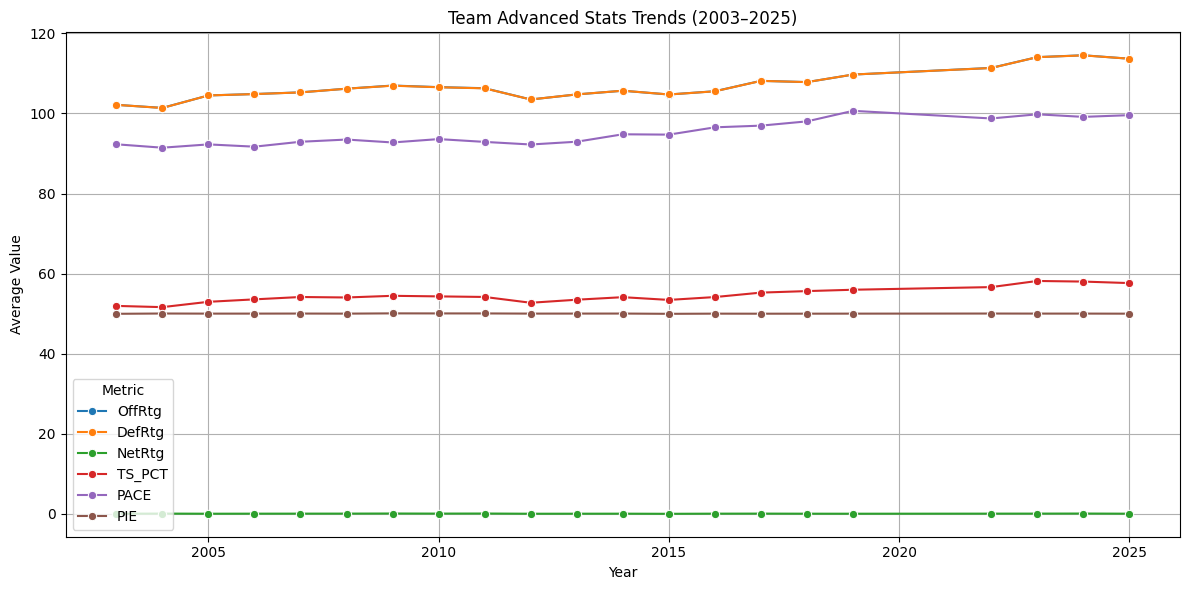

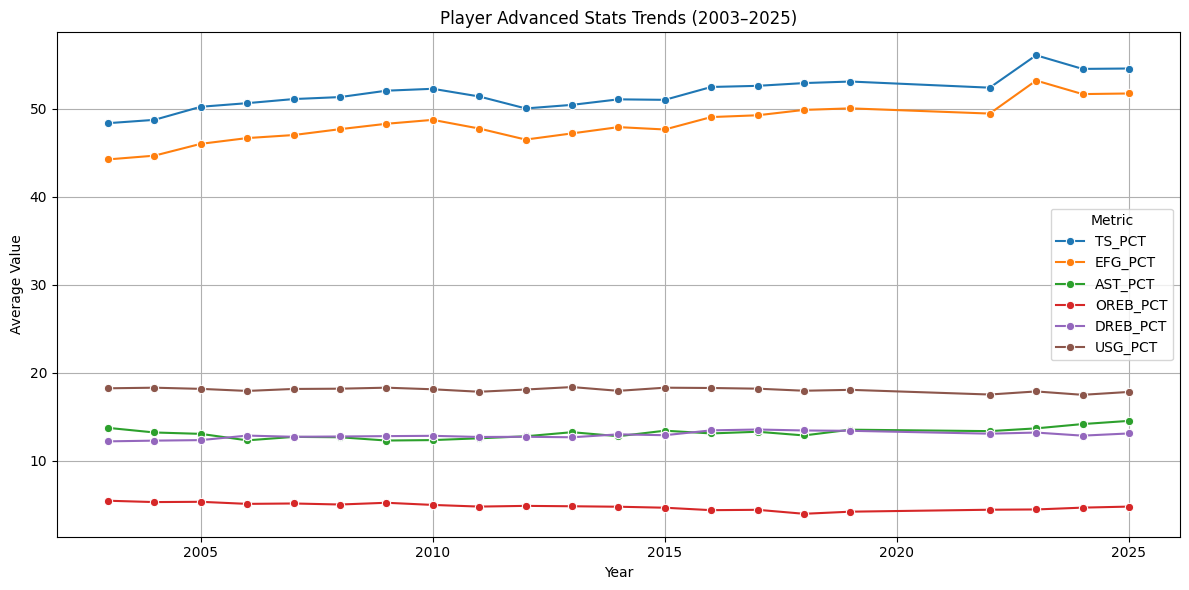

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload data after code execution environment reset
team_stats_path = "/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv"
player_stats_path = "/workspaces/Data-Science-Final-Project/NBA/data/official_player_advanced_stats.csv"

# Load the datasets
team_df = pd.read_csv(team_stats_path)
player_df = pd.read_csv(player_stats_path)

# Clean and prepare team data
team_df['Year'] = pd.to_numeric(team_df['Year'], errors='coerce')
team_df = team_df[team_df['Year'] >= 2003]

# Clean and prepare player data
player_df['YEAR'] = pd.to_numeric(player_df['YEAR'], errors='coerce')
player_df = player_df[player_df['YEAR'] >= 2003]

# Group by year and take mean of key stats for team and player
team_stats = team_df.groupby('Year')[['OffRtg', 'DefRtg', 'NetRtg', 'TS_PCT', 'PACE', 'PIE']].mean().reset_index()
player_stats = player_df.groupby('YEAR')[['TS_PCT', 'EFG_PCT', 'AST_PCT', 'OREB_PCT', 'DREB_PCT', 'USG_PCT']].mean().reset_index()

# Plot team stats trends
team_melted = team_stats.melt(id_vars='Year', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_melted, x='Year', y='Value', hue='Metric', marker="o")
plt.title('Team Advanced Stats Trends (2003–2025)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot player stats trends
player_melted = player_stats.melt(id_vars='YEAR', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 6))
sns.lineplot(data=player_melted, x='YEAR', y='Value', hue='Metric', marker="o")
plt.title('Player Advanced Stats Trends (2003–2025)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()
